In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
refColsDf = pd.read_csv(r'FinalSheets/dfReferenceCols.csv')
fullWordsDf = pd.read_csv(r'FinalSheets/wordsFullDfFinal.csv')
wordsNSDf = pd.read_csv(r'FinalSheets/wordsNoStopDfFinal.csv')
fullWordsHCDF = pd.read_csv(r'FinalSheets/wordsHighCorrDfFinal.csv')
stagsDf = pd.read_csv(r'FinalSheets/sTagRatesDfFinal.csv')
decepDf = pd.read_csv(r'FinalSheets/normalizedDecepCountDfFinal.csv')
decepHCDf = pd.read_csv(r'FinalSheets/normalizedDecepCountHighCorrDfFinal.csv')
combinedHCDf = pd.read_csv(r'FinalSheets/combinedNormalizedHighCorrDfFinal.csv')
winLossDf = pd.read_csv(r'FinalSheets/winLossDfFinal.csv')
decepWords = pd.read_csv('deceptionword.csv', names=['Words'])
decepWordCount = pd.read_csv('deceptiondocword.csv', names=decepWords['Words'].tolist())

decepLowCorrDf = pd.read_csv(r'FinalSheets/normalizedDecepCountLowCorrDfFinal.csv')
wordsLessCommon = pd.read_csv(r'FinalSheets/wordsInMT4SpeechesFinal.csv')
lowCorrWords = pd.read_csv(r'FinalSheets/wordsLowCorrDfFinal.csv')
completeCombinedDf = fullWordsDf.join(decepDf)

In [3]:
listOfDf = [fullWordsDf, wordsNSDf, stagsDf, decepDf, combinedHCDf,  wordsLessCommon, completeCombinedDf]
listOfNames = ["Full Words", "No Stop Words", "Stan Tags", "Deception", "Combined", "Words in >5 Speeches", "Complete Combined"]


candidates = refColsDf['Candidate']

In [4]:
pca = PCA(n_components=0.99)
lda3 = LinearDiscriminantAnalysis(n_components=3)
lda2 = LinearDiscriminantAnalysis(n_components=2)
lda1 = LinearDiscriminantAnalysis()
svd2 = TruncatedSVD(n_components=2)
svd5 = TruncatedSVD(n_components=5)

pcaFW = pca.fit_transform(fullWordsDf)
pcaNS = pca.fit_transform(wordsNSDf)
pcaST = pca.fit_transform(stagsDf)
pcaD = pca.fit_transform(decepDf)
pcaCHC = pca.fit_transform(combinedHCDf)
pcaWLC = pca.fit_transform(wordsLessCommon)
pcaCC = pca.fit_transform(completeCombinedDf)

lda1FW = lda1.fit_transform(fullWordsDf, np.ravel(winLossDf))
lda1NS = lda1.fit_transform(wordsNSDf, np.ravel(winLossDf))
lda1ST = lda1.fit_transform(stagsDf, np.ravel(winLossDf))
lda1D = lda1.fit_transform(decepDf, np.ravel(winLossDf))
lda1CHC = lda1.fit_transform(combinedHCDf, np.ravel(winLossDf))
lda1WLC = lda1.fit_transform(wordsLessCommon, np.ravel(winLossDf))
lda1CC = lda1.fit_transform(completeCombinedDf, np.ravel(winLossDf))

lda2FW = lda2.fit_transform(fullWordsDf, candidates.tolist())
lda2CHC = lda2.fit_transform(combinedHCDf, candidates.tolist())

svd5FW = svd5.fit_transform(fullWordsDf)
svd5NS = svd5.fit_transform(wordsNSDf)
svd5ST = svd5.fit_transform(stagsDf)
svd5D = svd5.fit_transform(decepDf)
svd5CHC = svd5.fit_transform(combinedHCDf)
svd5WLC = svd5.fit_transform(wordsLessCommon)
svd5CC = svd5.fit_transform(completeCombinedDf)

svd2FW = svd2.fit_transform(fullWordsDf) 


pcaFW.shape

(431, 299)

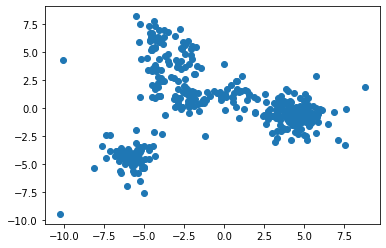

In [5]:
plt.scatter(lda2FW[:,0],lda2FW[:,1])

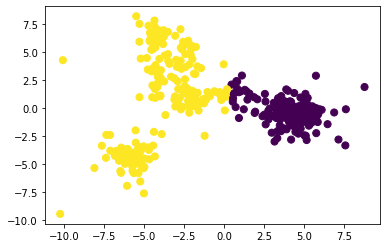

In [6]:
clust = KMeans(n_clusters=2, random_state=0).fit(lda2FW)
y_kmeans = clust.predict(lda2FW)
plt.scatter(lda2FW[:, 0], lda2FW[:, 1], c=y_kmeans, s=50, cmap='viridis')

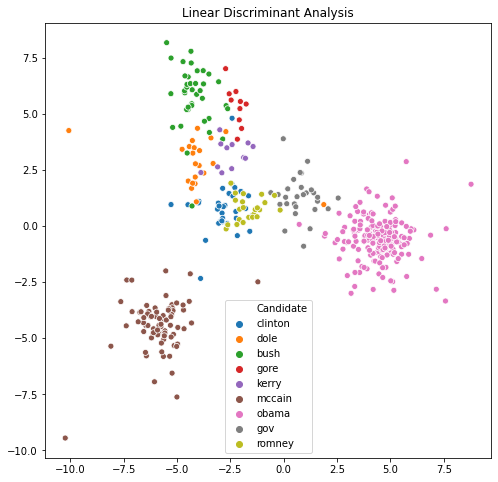

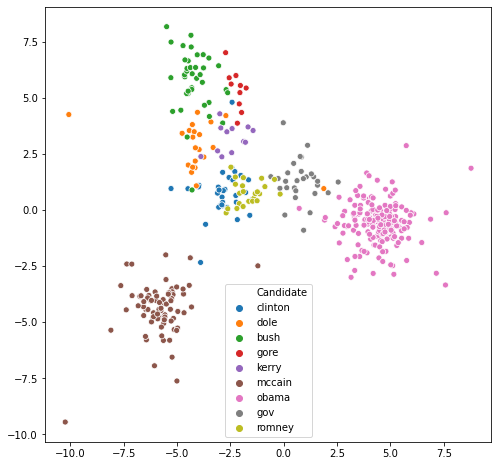

In [7]:
def plot_shit(model_ftrs, title, fig_segment):
    fig_dims = (8, 8)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.scatterplot(x=model_ftrs[:,0],
                    y=model_ftrs[:,1],
                    ax=ax,
                    data=doc_words_no_stpwrds_cand,
                    hue=fig_segment
                   ).set_title(title)

doc_words_no_stpwrds_cand = pd.concat([candidates, fullWordsDf], axis=1)

plot_shit(lda2FW, 'Linear Discriminant Analysis', 'Candidate')

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x=lda2FW[:,0],
                y=lda2FW[:,1],
                ax=ax,
                data=doc_words_no_stpwrds_cand,
                hue='Candidate',
                )



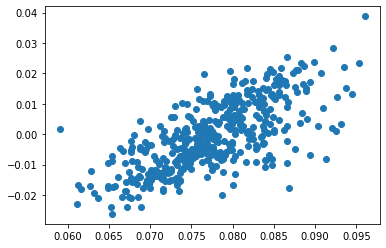

In [8]:
plt.scatter(svd2FW[:,0],svd2FW[:,1])

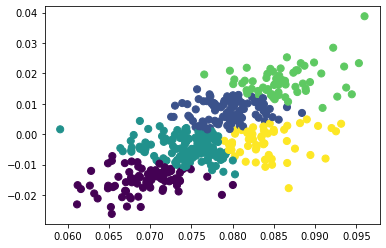

In [9]:
clust = KMeans(n_clusters=5, random_state=0).fit(svd2FW)
y_kmeans = clust.predict(svd2FW)
plt.scatter(svd2FW[:, 0], svd2FW[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [10]:
pcaFW = pd.DataFrame(pcaFW)
pcaNS = pd.DataFrame(pcaNS)
pcaST = pd.DataFrame(pcaST)
pcaD = pd.DataFrame(pcaD)
pcaCHC = pd.DataFrame(pcaCHC)
pcaWLC = pd.DataFrame(pcaWLC)
pcaCC = pd.DataFrame(pcaCC)

lda2FW = pd.DataFrame(lda2FW)
lda2CHC = pd.DataFrame(lda2CHC)



lda1FW = pd.DataFrame(lda1FW)
lda1NS = pd.DataFrame(lda1NS)
lda1ST = pd.DataFrame(lda1ST)
lda1D = pd.DataFrame(lda1D)
lda1CHC = pd.DataFrame(lda1CHC)
lda1WLC = pd.DataFrame(lda1WLC)
lda1CC = pd.DataFrame(lda1CC)

svd5FW = pd.DataFrame(svd5FW)
svd5NS = pd.DataFrame(svd5NS)
svd5ST = pd.DataFrame(svd5ST)
svd5D = pd.DataFrame(svd5D)
svd5CHC = pd.DataFrame(svd5CHC)
svd5WLC = pd.DataFrame(svd5WLC)
svd5CC = pd.DataFrame(svd5CC)

pcaFW.to_csv(r'FinalSheets/pcaFW.csv', index=False, header=False)
pcaNS.to_csv(r'FinalSheets/pcaNS.csv', index=False, header=False)
pcaST.to_csv(r'FinalSheets/pcaST.csv', index=False, header=False)
pcaD.to_csv(r'FinalSheets/pcaD.csv', index=False, header=False)
pcaCHC.to_csv(r'FinalSheets/pcaCHC.csv', index=False, header=False) #>5% Correlation
pcaWLC.to_csv(r'FinalSheets/pcaWLC.csv', index=False, header=False)
pcaCC.to_csv(r'FinalSheets/pcaCC.csv', index=False, header=False)

lda2FW.to_csv(r'FinalSheets/lda2FW.csv', index=False, header=False)
lda2CHC.to_csv(r'FinalSheets/lda2CHC.csv', index=False, header=False)

lda1FW.to_csv(r'FinalSheets/lda1FW.csv', index=False, header=False)
lda1NS.to_csv(r'FinalSheets/lda1NS.csv', index=False, header=False)
lda1ST.to_csv(r'FinalSheets/lda1ST.csv', index=False, header=False)
lda1D.to_csv(r'FinalSheets/lda1D.csv', index=False, header=False)
lda1CHC.to_csv(r'FinalSheets/lda1CHC.csv', index=False, header=False)
lda1WLC.to_csv(r'FinalSheets/lda1WLC.csv', index=False, header=False)
lda1CC.to_csv(r'FinalSheets/lda1CC.csv', index=False, header=False)

svd5FW.to_csv(r'FinalSheets/svd5FW.csv', index=False, header=False)
svd5NS.to_csv(r'FinalSheets/svd5NS.csv', index=False, header=False)
svd5ST.to_csv(r'FinalSheets/svd5ST.csv', index=False, header=False)
svd5D.to_csv(r'FinalSheets/svd5D.csv', index=False, header=False)
svd5CHC.to_csv(r'FinalSheets/svd5CHC.csv', index=False, header=False)
svd5WLC.to_csv(r'FinalSheets/svd5WLC.csv', index=False, header=False)
svd5CC.to_csv(r'FinalSheets/svd5CC.csv', index=False, header=False)

Text(0, 0.5, 'Accuracy')

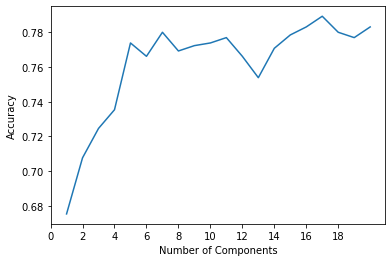

In [11]:
cvf = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
gaussNB = GaussianNB()
accSer = []

for num in range(1,21):
    svd = TruncatedSVD(n_components=num)
    df = svd.fit_transform(fullWordsDf)
    scores = cross_val_score(gaussNB, df, np.ravel(winLossDf), cv=cvf)
    accSer.append(np.mean(scores))
    
plt.plot(np.arange(1,21), accSer)
plt.xticks(np.arange(0,20,2))
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")